## Adaptive Thresholding

Some images that contain segments with differces in lighting may be tricky to turn into a black and white representation because a single threshold won't work for the whole picture. There are several methods to perform adaptive thresholding.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import rcParams

# Plot

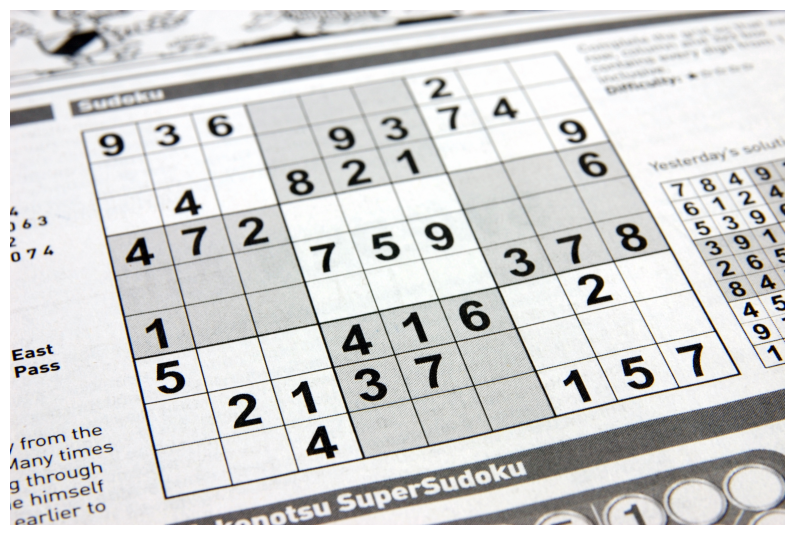

In [3]:
rcParams['figure.figsize'] = 10,14
img = plt.imread('images/sudoku.jpg')
plt.axis("off")
plt.imshow(img)

# Histogram of pixel colors

(2000, 3008)


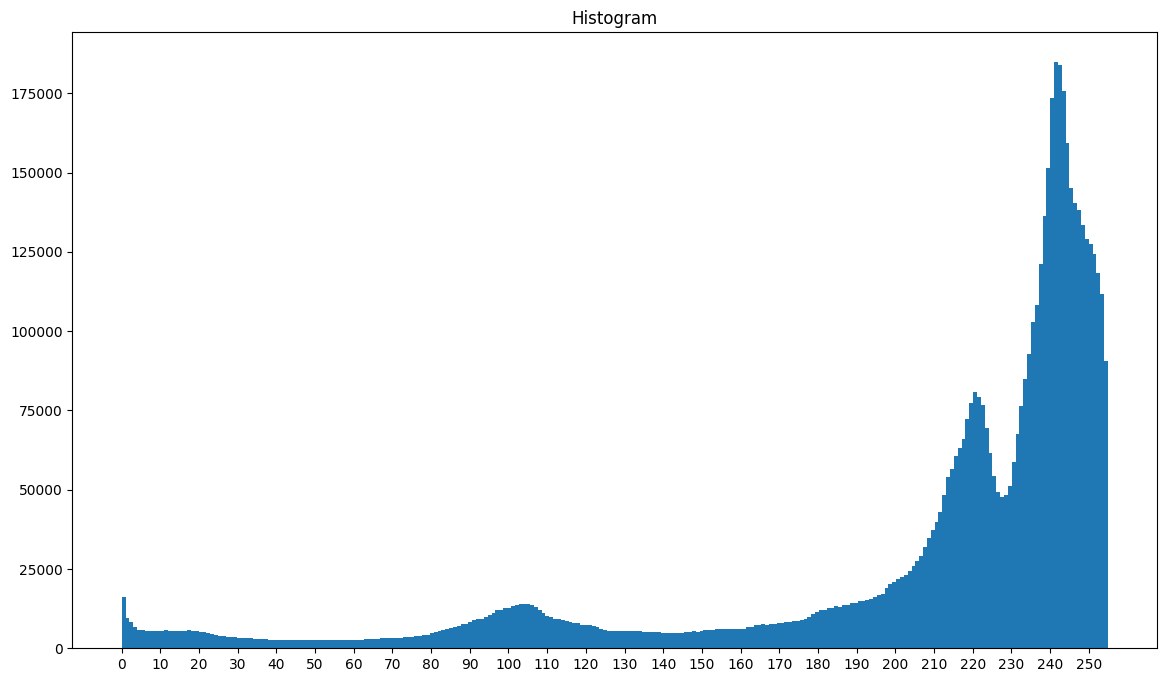

In [4]:
# Let's see a histogram of the grayscale image
img = np.dot(img[...,:3], [0.299,0.587,0.114])
print(np.shape(img))

rcParams['figure.figsize'] = (14,8)
plt.hist(img.ravel(),256,[0,255])
plt.title('Histogram')
plt.xticks(np.arange(0, 255, 10))
plt.show()

# Compare plots of Thresholding

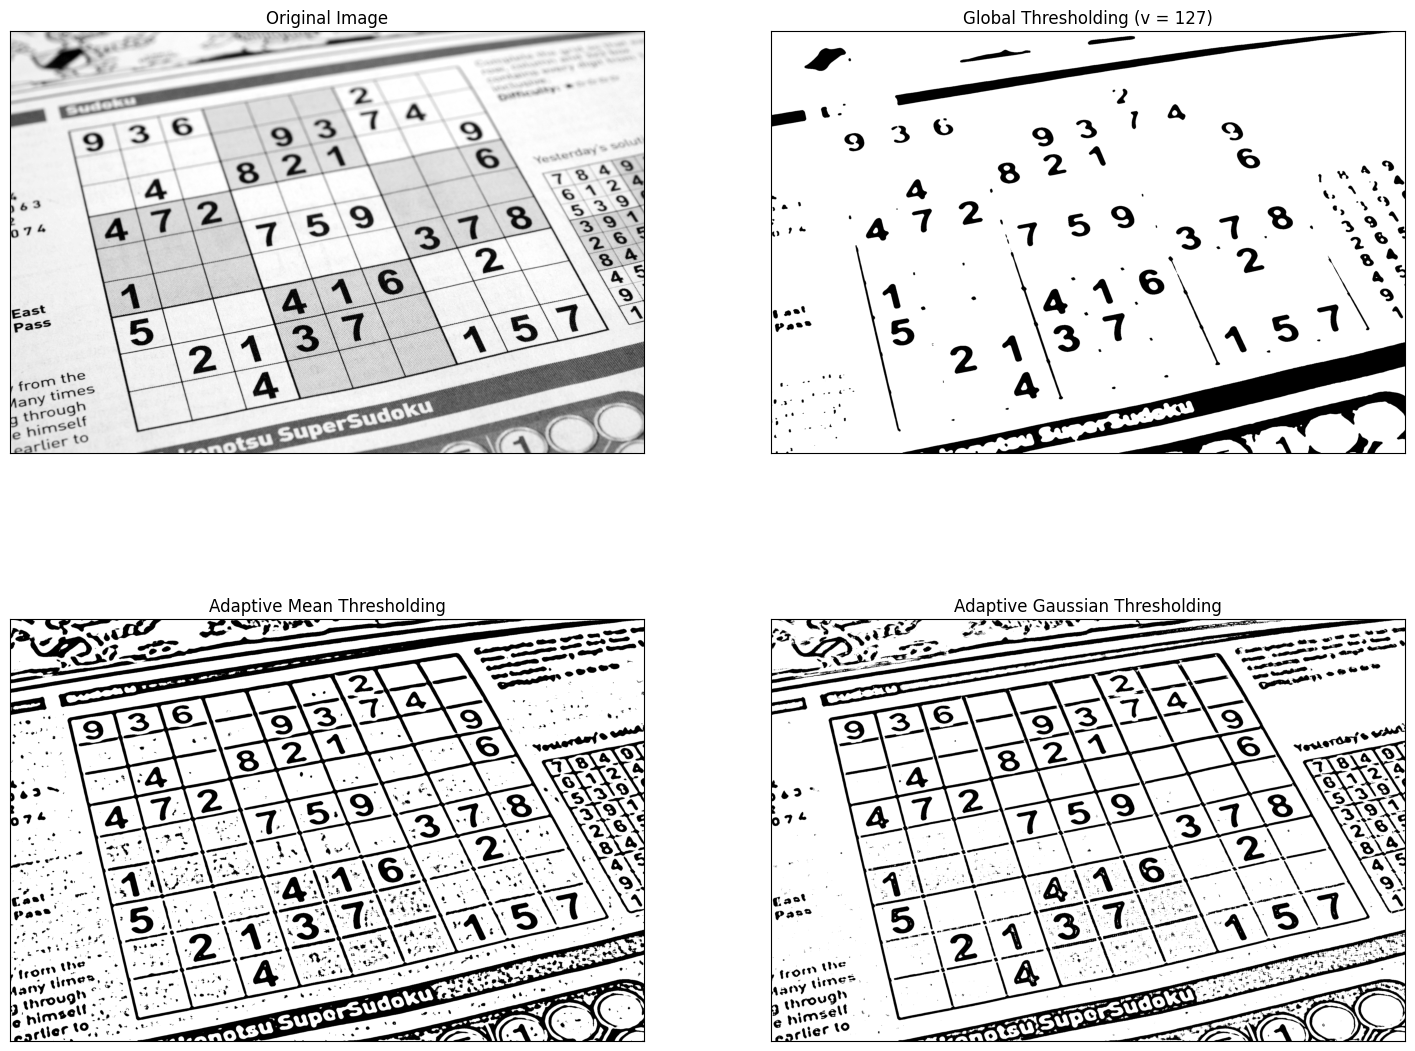

In [6]:
# Now let's see a piece of code from OpenCV's website where two adaptive
# threshold methods are used: 
#                     - Adaptive Mean Thresholding
#                     - Adaptive Gaussian Thresholding 
rcParams['figure.figsize'] = (18,14)
threshold = 127 # Also try it with 215 and 225
img0 = cv2.imread('images/sudoku.jpg',0)
img = cv2.medianBlur(img0,17)
ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,33,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,33,2)
titles = ['Original Image', 'Global Thresholding (v = '+str(threshold)+')',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img0, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Compare Black&White plots

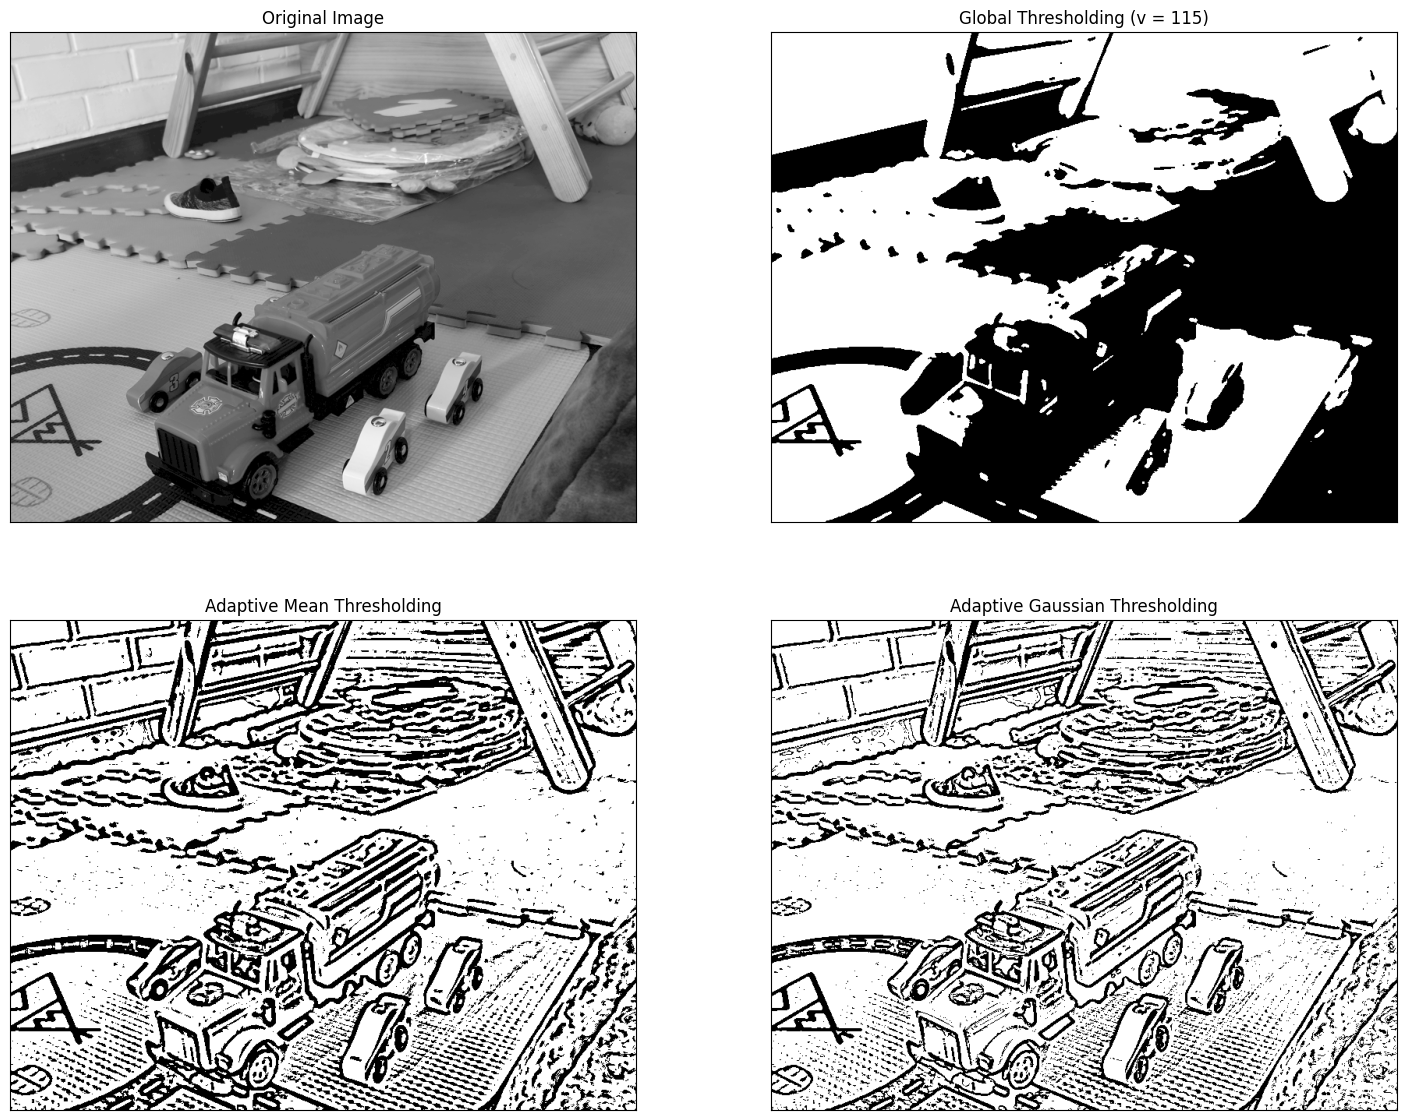

In [8]:
# Now let's see it with the play space image
rcParams['figure.figsize'] = (18,14)
threshold = 115
img0 = cv2.imread('images/playspace.png',0)
img = cv2.medianBlur(img0,5)
ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = '+str(threshold)+')',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img0, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()